── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
ggbreak v0.1.2

If you use ggbreak in published research, please cite the following
paper:

S Xu, M Chen, T Feng, L Zhan, L Zhou, G Yu. Use ggbreak to effectively
utilize plotting space to deal with large datasets and outliers.
Frontiers in Genetics. 2021, 12:774846. doi: 10.3389/fgene.2021.774846



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


Warni

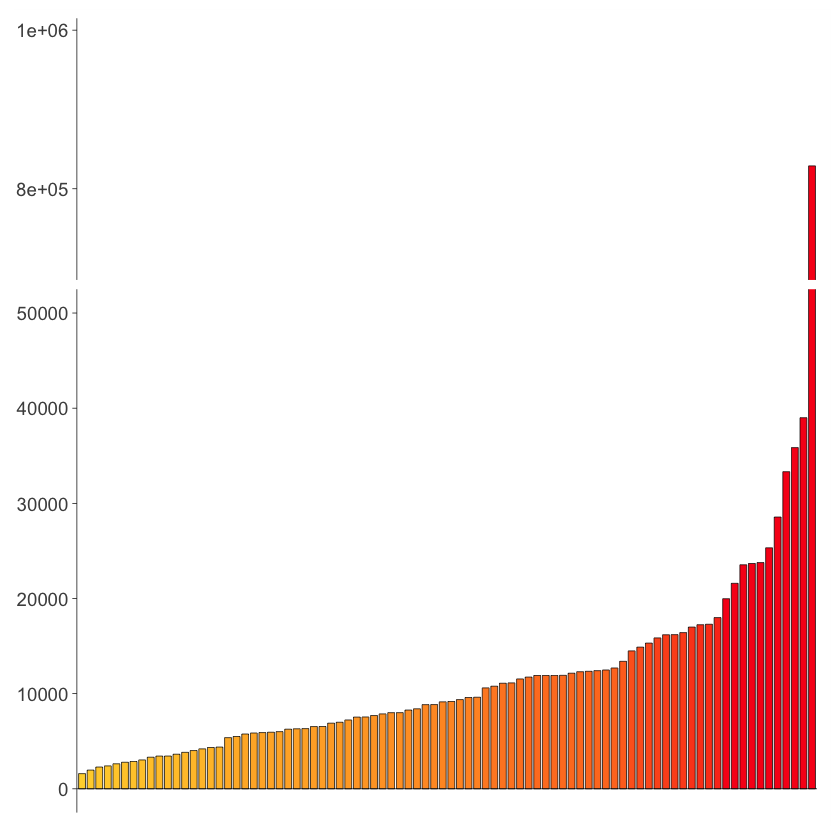

In [1]:
##### Load packages #####
library(tidyverse)
library(ggplot2)
library(ggbreak)
library(scales)

# Load CSV
graphdata <- NULL
graphdata <- read.csv("raw_data/FI_LMM_wide.csv")
graphdata_long <- graphdata %>%
  gather(column, value)
# Make order factor
desired_order <- graphdata_long$column


# Make bar plot
bar_plot <- ggplot(graphdata_long, aes(x = factor(column, levels = desired_order), y = value, fill = value)) +
  geom_bar(stat = "identity", width = 0.8, position = "dodge", color = "black", size = 0.2) + 
  scale_y_break(c(50000, 700000), scales=c(0.5, 20)) +
  scale_fill_gradient(low = "#FFE13C", high = "#F8081B", limits = c(0, 20000), na.value = "#F8081B") + # Set the gradient colors
  scale_y_continuous(expand = expansion(mult = c(0, 0)),  # Ensure no expansion of the y-axis
                     limits = c(0, 1000000), 
                     breaks = c(0, 10000, 20000, 30000, 40000, 50000, 800000, 1000000)) +
  theme_minimal() +
  theme(
    axis.line = element_line(color = "black", size = 0.2),
    axis.text.x = element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    legend.title = element_blank(),
    legend.text = element_blank(),
    legend.box = element_blank(),
    legend.key = element_blank(),
    panel.background = element_blank(),
    panel.grid = element_blank(),
    axis.text.y.right = element_blank(),
    axis.ticks.y.right = element_blank(),
    axis.line.y.right = element_blank(),
    axis.line.x = element_blank(),
    axis.ticks.y = element_line(color = "black", size = 0.2),  
    text = element_text(color = "black", family = "Arial", size = 14)
   ) +
   guides(fill = FALSE) +
  geom_hline(yintercept = 0, color = "black", size = 0.2)  # Add a horizontal line at y=0

print(bar_plot)

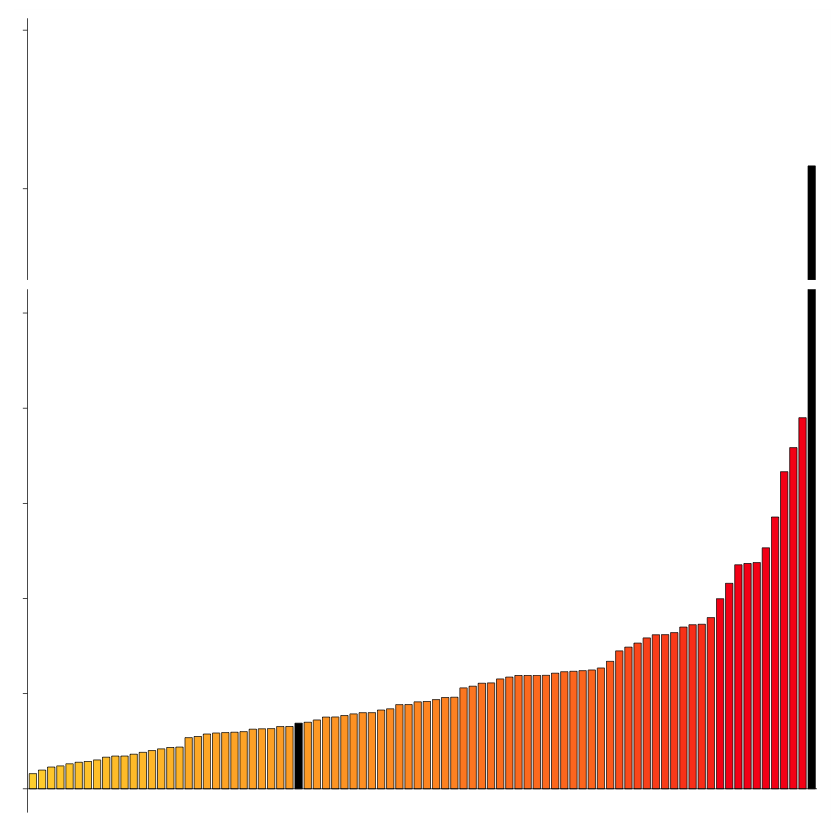

In [2]:
# Extract color information
plot_data <- ggplot_build(bar_plot)
bar_colors <- plot_data$data[[1]]$fill
# Change the color of the 30th and 86th bars to black
bar_colors[c(30, 86)] <- "#000000"


# Redraw the bar plot with updated colors
updated_bar_plot <- ggplot(graphdata_long, aes(x = factor(column, levels = desired_order), y = value)) +
  geom_bar(stat = "identity", width = 0.8, position = "dodge",aes(fill = factor(column, levels = desired_order)), color = "black", size = 0.2) + 
  scale_y_break(c(50000, 700000), scales=c(0.5, 20)) +
  scale_fill_manual(values = bar_colors) +
  scale_y_continuous(expand = expansion(mult = c(0, 0)),  # Ensure no expansion of the y-axis
                     limits = c(0, 1000000), 
                     breaks = c(0, 10000, 20000, 30000, 40000, 50000, 800000, 1000000)) +
  theme_minimal() +
  theme(
    axis.line = element_line(color = "black", size = 0.2),
    axis.text.x = element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    legend.title = element_blank(),
    legend.text = element_blank(),
    legend.box = element_blank(),
    legend.key = element_blank(),
    panel.background = element_blank(),
    panel.grid = element_blank(),
    axis.text.y.right = element_blank(),
    axis.ticks.y.right = element_blank(),
    axis.line.y.right = element_blank(),
    axis.line.x = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks.y = element_line(color = "black", size = 0.2),  
    text = element_text(color = "black", family = "Arial", size = 14)
  ) +
  guides(fill = FALSE) +
  geom_hline(yintercept = 0, color = "black", size = 0.2)  # Add a horizontal line at y=0

print(updated_bar_plot)


In [3]:
# Set the file path and name for saving the heatmap
plot_final <- "Final/Fig2A_revised.tif"

# Open the TIFF device with high resolution and DPI
tiff(plot_final, width = 18, height = 5, res = 600, units = "cm")
updated_bar_plot
dev.off()

# make color info csv
cinfo<-NULL
cinfo <- data.frame(desired_order,bar_colors)
write.csv(cinfo, "Final/Fig2A_color.csv", row.names = FALSE)

pdf 
  2

In [5]:
# Extract the legend from the original plot
legend_plot <- ggplot(graphdata_long, aes(x = factor(column, levels = desired_order), y = value, fill = value)) +
  geom_bar(stat = "identity", width = 0.8, position = "dodge", color = "black", linewidth = 0.2) +
  scale_fill_gradient(low = "#FFE13C", high = "#F8081B", limits = c(0, 20000), na.value = "#F8081B") + 
  theme_minimal() +
  theme(
    legend.title = element_blank(),
    legend.text = element_text(family = "Helvetica", size = 19),
    legend.key.height = unit(1, "cm"),
    legend.key.width = unit(0.5, "cm")
  )

# Extract the legend as a separate plot
legend <- cowplot::get_legend(legend_plot)

# Save the legend as a TIFF file
tiff("final/color_legend.tiff", width = 2, height = 4, units = "in", res = 300)
grid::grid.draw(legend)
dev.off()


Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”


pdf 
  2